In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
pertubations = {"base": {0: {"mode": False, "type": 'no', "pertubation_angle": 0},
                    20: {"mode": True, "type": 'sudden', "pertubation_angle": +30},
                    80: {"mode": False, "type": 'no', "pertubation_angle": 0},
                    100: {"mode": True, "type": 'sudden', "pertubation_angle": +30},
                    160: {"mode": False,"type": 'no', "pertubation_angle": 0}
                    },
                "generalisation": {0: {"mode": False, "type": 'no', "target_angle": 30, "pertubation_angle": 0},
                    20: {"mode": True, "type": 'sudden', "target_angle": 30, "pertubation_angle": 30},
                    80: {"mode": False, "type": 'no', "target_angle": 30, "pertubation_angle": 0},
                    101: {"mode": False, "type": 'no', "target_angle": 60, "pertubation_angle": 0},
                    120: {"mode": True, "type": 'sudden', "target_angle": 60, "pertubation_angle": 30},
                    180: {"mode": False, "type": 'no', "target_angle": 60, "pertubation_angle": 0},
                    201: {"mode": False, "type": 'no', "target_angle": 45, "pertubation_angle": 0},
                    220: {"mode": True, "type": 'sudden', "target_angle": 45, "pertubation_angle": 30},
                    280: {"mode": False, "type": 'no', "target_angle": 45, "pertubation_angle": 0},
                    301: {"mode": False, "type": 'no', "target_angle": 130, "pertubation_angle": 0},
                    320: {"mode": True, "type": 'sudden', "target_angle": 130, "pertubation_angle": 30},
                    380: {"mode": False, "type": 'no', "target_angle": 130, "pertubation_angle": 0}
                    },
                "finger": {0: {"mode": False, "type": 'no', "pertubation_angle": 0, "finger": "index"},
                    20: {"mode": True, "type": 'sudden', "pertubation_angle": +30, "finger": "index"},
                    80: {"mode": False, "type": 'no', "pertubation_angle": 0, "finger": "index"},
                    100: {"mode": True, "type": 'sudden', "pertubation_angle": +30, "finger": "index"},
                    160: {"mode": False,"type": 'no', "pertubation_angle": 0, "finger": "index"},
                    180: {"mode": False, "type": 'no', "pertubation_angle": 0, "finger": "middle"},
                    200: {"mode": True, "type": 'sudden', "pertubation_angle": +30, "finger": "middle"},
                    260: {"mode": False, "type": 'no', "pertubation_angle": 0, "finger": "middle"},
                    280: {"mode": True, "type": 'sudden', "pertubation_angle": +30, "finger": "middle"},
                    340: {"mode": False,"type": 'no', "pertubation_angle": 0, "finger": "middle"}
                    },
                }
ATTEMPTS_LIMIT = {"base": 180, "generalisation": 400, "finger" : 360}

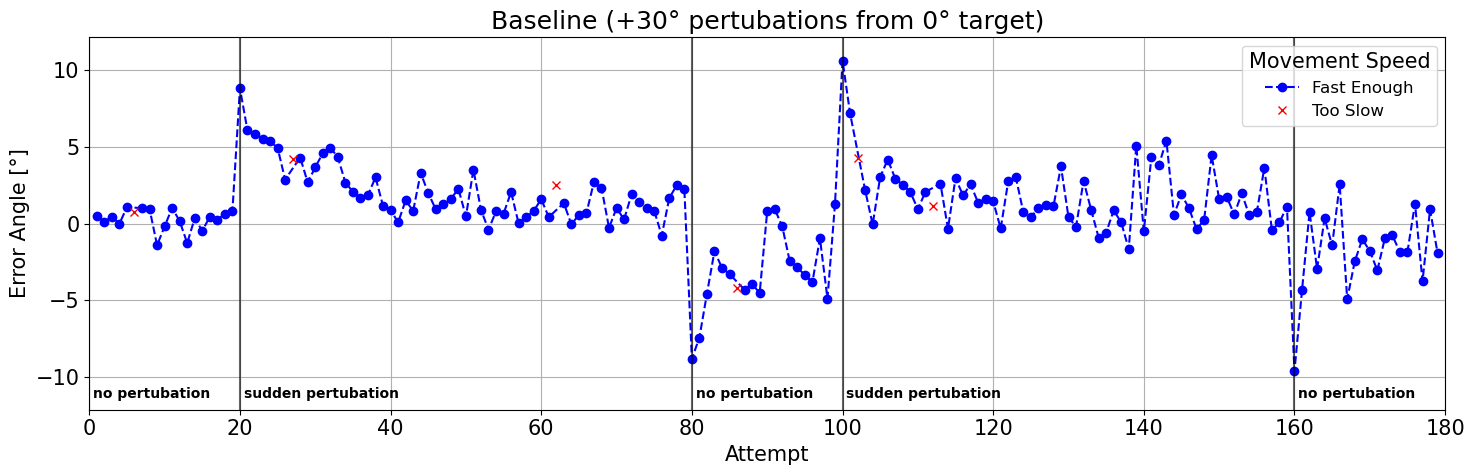

In [28]:
experiment_design = "base"
number = 0

# load data
error_angles_base = pd.read_csv(f'{experiment_design}/savings_{number}/error_angles_savings_{number}_{experiment_design}.csv', header=None)
error_angles_base = error_angles_base.to_numpy(dtype=float).flatten()

move_faster_events_base = pd.read_csv(f'{experiment_design}/savings_{number}/move_faster_savings_{number}_{experiment_design}.csv', header=None)
move_faster_events_base = move_faster_events_base.to_numpy(dtype=bool).flatten()

attempts = np.arange(1, len(error_angles_base)+1)

# compute MV
motor_variabilities = []
section_idxs = list(pertubations[experiment_design].keys()) + [ATTEMPTS_LIMIT[experiment_design]]
for i in range(len(section_idxs) - 1):
    motor_variabilities.append(np.var(error_angles_base[section_idxs[i]:section_idxs[i+1]]))
motor_variabilities = np.array(motor_variabilities)

# plot error angles
fig = plt.figure(figsize=(15, 5))
plt.rcParams.update({'font.size': 15})

plt.plot(attempts[~move_faster_events_base], error_angles_base[~move_faster_events_base], 'o', linestyle="--", color = "blue", label = "Fast Enough")
plt.plot(attempts[move_faster_events_base], error_angles_base[move_faster_events_base], 'x', linestyle="", color = "red", label = "Too Slow")

for sec_idx, x in enumerate(section_idxs[:-1]):
    plt.axvline(x=x, color='black', linestyle='-', alpha = 0.6)
    description = pertubations[experiment_design][x]["type"] + " pertubation"
    if "target_angle" in list(pertubations[experiment_design][x].keys()):
        description += "\n" + str(pertubations[experiment_design][x]["target_angle"]) + "° target"
    plt.text(x+0.5, plt.ylim()[0], description, color='black', verticalalignment='top', horizontalalignment='left', weight='bold', fontsize=10)

ylim = max(abs(plt.ylim()[0]), abs(plt.ylim()[1])) + 0.5
plt.ylim(-ylim, +ylim)
plt.ylim(-ylim, +ylim)
plt.xlim(0, ATTEMPTS_LIMIT[experiment_design])

plt.grid()
plt.xlabel('Attempt')
plt.ylabel('Error Angle [°]')
plt.legend(title='Movement Speed', fontsize = 12)
plt.title("Baseline (+30° pertubations from 0° target)")
plt.tight_layout()

plt.savefig(f'error_over_time_base_before.png')
plt.show()

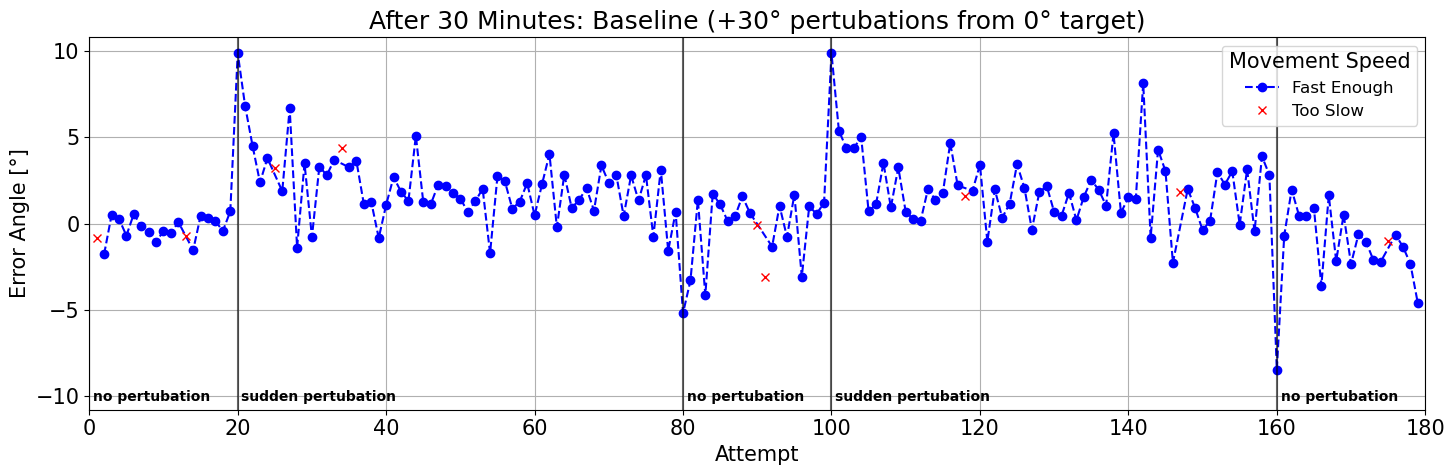

In [32]:
experiment_design = "base"
number = 1

# load data
error_angles_base_later = pd.read_csv(f'{experiment_design}/savings_{number}/error_angles_savings_{number}_{experiment_design}.csv', header=None)
error_angles_base_later = error_angles_base_later.to_numpy(dtype=float).flatten()

move_faster_events_base_later = pd.read_csv(f'{experiment_design}/savings_{number}/move_faster_savings_{number}_{experiment_design}.csv', header=None)
move_faster_events_base_later = move_faster_events_base_later.to_numpy(dtype=bool).flatten()

attempts = np.arange(1, len(error_angles_base_later)+1)

# compute MV
motor_variabilities = []
section_idxs = list(pertubations[experiment_design].keys()) + [ATTEMPTS_LIMIT[experiment_design]]
for i in range(len(section_idxs) - 1):
    motor_variabilities.append(np.var(error_angles_base_later[section_idxs[i]:section_idxs[i+1]]))
motor_variabilities = np.array(motor_variabilities)

# plot error angles
fig = plt.figure(figsize=(15, 5))
plt.rcParams.update({'font.size': 15})

plt.plot(attempts[~move_faster_events_base_later], error_angles_base_later[~move_faster_events_base_later], 'o', linestyle="--", color = "blue", label = "Fast Enough")
plt.plot(attempts[move_faster_events_base_later], error_angles_base_later[move_faster_events_base_later], 'x', linestyle="", color = "red", label = "Too Slow")

for sec_idx, x in enumerate(section_idxs[:-1]):
    plt.axvline(x=x, color='black', linestyle='-', alpha = 0.6)
    description = pertubations[experiment_design][x]["type"] + " pertubation"
    if "target_angle" in list(pertubations[experiment_design][x].keys()):
        description += "\n" + str(pertubations[experiment_design][x]["target_angle"]) + "° target"
    plt.text(x+0.5, plt.ylim()[0] - 0.25, description, color='black', verticalalignment='top', horizontalalignment='left', weight='bold', fontsize=10)

ylim = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
plt.ylim(-ylim, +ylim)
plt.ylim(-ylim, +ylim)
plt.xlim(0, ATTEMPTS_LIMIT[experiment_design])

plt.grid()
plt.xlabel('Attempt')
plt.ylabel('Error Angle [°]')
plt.legend(title='Movement Speed', fontsize = 12)
plt.title("After 30 Minutes: Baseline (+30° pertubations from 0° target)")
plt.tight_layout()

plt.savefig(f'error_over_time_base_after.png')
plt.show()

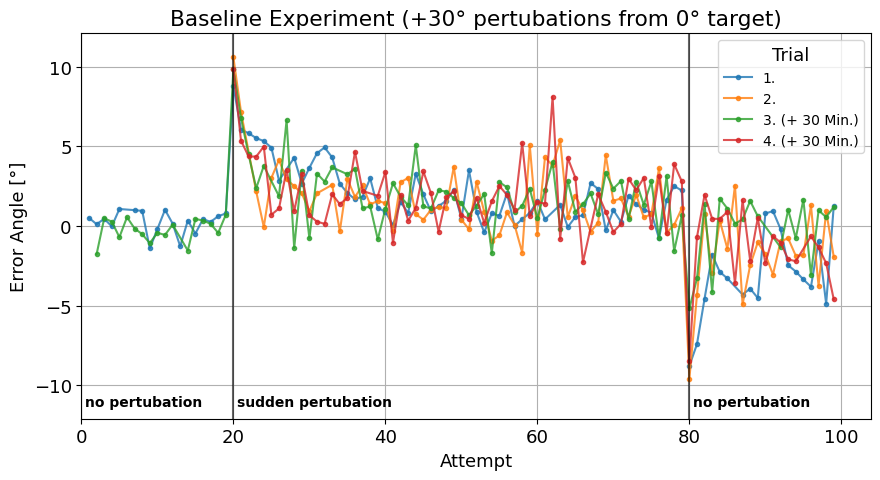

In [18]:
# better plot
fig = plt.figure(figsize=(9, 5))
plt.rcParams.update({'font.size': 13})

plt.plot(attempts[:99][~move_faster_events_base[:99]], error_angles_base[:99][~move_faster_events_base[:99]], '.', linestyle="-", label="1.", alpha = 0.8)
plt.plot(attempts[99:][~move_faster_events_base[99:]] % 100 + 20, error_angles_base[99:][~move_faster_events_base[99:]], '.', linestyle="-", label="2.", alpha = 0.8)
plt.plot(attempts[:99][~move_faster_events_base_later[:99]], error_angles_base_later[:99][~move_faster_events_base_later[:99]], '.', linestyle="-", label="3. (+ 30 Min.)", alpha = 0.8)
plt.plot(attempts[99:][~move_faster_events_base_later[99:]] % 100 + 20, error_angles_base_later[99:][~move_faster_events_base_later[99:]], '.', linestyle="-", label="4. (+ 30 Min.)", alpha = 0.8)

for sec_idx, x in enumerate(section_idxs[:3]):
    plt.axvline(x=x, color='black', linestyle='-', alpha = 0.6)
    description = pertubations[experiment_design][x]["type"] + " pertubation"
    if "target_angle" in list(pertubations[experiment_design][x].keys()):
        description += "\n" + str(pertubations[experiment_design][x]["target_angle"]) + "° target"
    plt.text(x+0.5, plt.ylim()[0], description, color='black', verticalalignment='top', horizontalalignment='left', weight='bold', fontsize=10)

ylim = max(abs(plt.ylim()[0]), abs(plt.ylim()[1])) + 0.5
plt.ylim(-ylim, +ylim)
plt.ylim(-ylim, +ylim)
plt.xlim(0, )

plt.grid()
plt.xlabel('Attempt')
plt.ylabel('Error Angle [°]')
plt.legend(title='Trial', fontsize = 10, loc="upper right")
plt.title("Baseline Experiment (+30° pertubations from 0° target)")
plt.tight_layout()
plt.show()

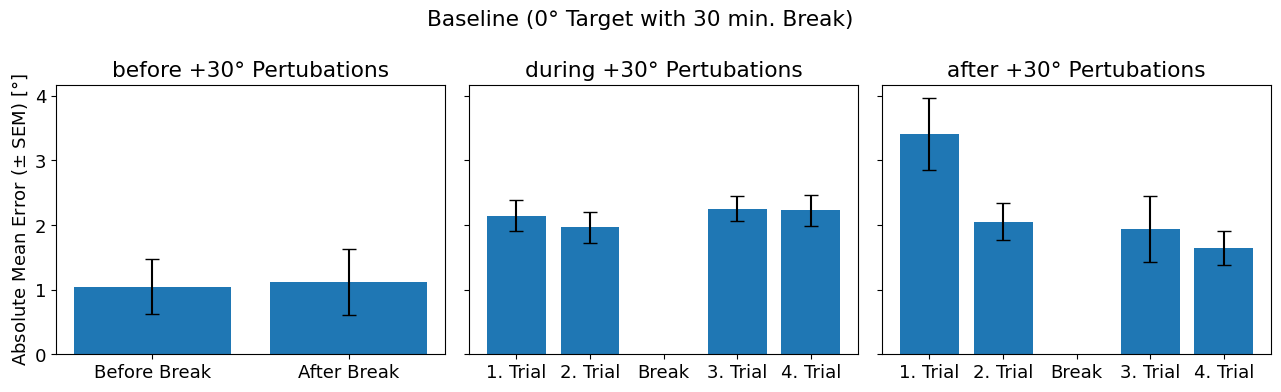

In [43]:
experiment_design = "base"

fig, axs = plt.subplots(1, 3, figsize=(13, 4), sharey=True)
plt.rcParams.update({'font.size': 13})

error_angles_means = [[], [], []] # after, during, before pertubation
error_angles_sems = [[], [], []]

section_idxs = list(pertubations[experiment_design].keys()) + [ATTEMPTS_LIMIT[experiment_design]]
for i in range(0, len(section_idxs) - 1):
    error_angles_i = np.abs(error_angles_base[section_idxs[i]:section_idxs[i+1]][~move_faster_events_base[section_idxs[i]:section_idxs[i+1]]])
    error_angles_i_mean = np.mean(error_angles_i)
    error_angles_i_sem = np.std(error_angles_i) / np.sqrt(len(error_angles_i))
    if i == 0:
        index = 0
    elif i in [1, 3]:
        index = 1
    else:
        index = 2
    error_angles_means[index].append(error_angles_i_mean)
    error_angles_sems[index].append(error_angles_i_sem)
    

for i in range(0, len(section_idxs) - 1):
    error_angles_i = np.abs(error_angles_base_later[section_idxs[i]:section_idxs[i+1]][~move_faster_events_base_later[section_idxs[i]:section_idxs[i+1]]])
    error_angles_i_mean = np.mean(error_angles_i)
    error_angles_i_sem = np.std(error_angles_i) / np.sqrt(len(error_angles_i))
    if i == 0:
        index = 0
    elif i in [1, 3]:
        index = 1
    else:
        index = 2
    error_angles_means[index].append(error_angles_i_mean)
    error_angles_sems[index].append(error_angles_i_sem)


labels = ["1. Trial", "2. Trial", "3. Trial", "4. Trial"]

fig.suptitle("Baseline (0° Target with 30 min. Break)")

# First subplot
axs[0].bar([1, 2], error_angles_means[0], yerr=error_angles_sems[0], capsize=5)
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(["Before Break", "After Break"])
axs[0].set_ylabel(r"Absolute Mean Error ($\pm$ SEM) [°]")
axs[0].set_title("before +30° Pertubations")

axs[1].bar([1, 2, 4, 5], error_angles_means[1], yerr=error_angles_sems[1], capsize=5)
axs[1].set_xticks([1, 2, 3, 4, 5])
axs[1].set_xticklabels(["1. Trial", "2. Trial", "Break", "3. Trial", "4. Trial"])
axs[1].set_title("during +30° Pertubations")

# Second subplot
axs[2].bar([1, 2, 4, 5], error_angles_means[2], yerr=error_angles_sems[2], capsize=5)
axs[2].set_xticks([1, 2, 3, 4, 5])
axs[2].set_xticklabels(["1. Trial", "2. Trial", "Break", "3. Trial", "4. Trial"])
axs[2].set_title("after +30° Pertubations")

plt.tight_layout()
plt.savefig(f'error_bars_base.png')
plt.show()

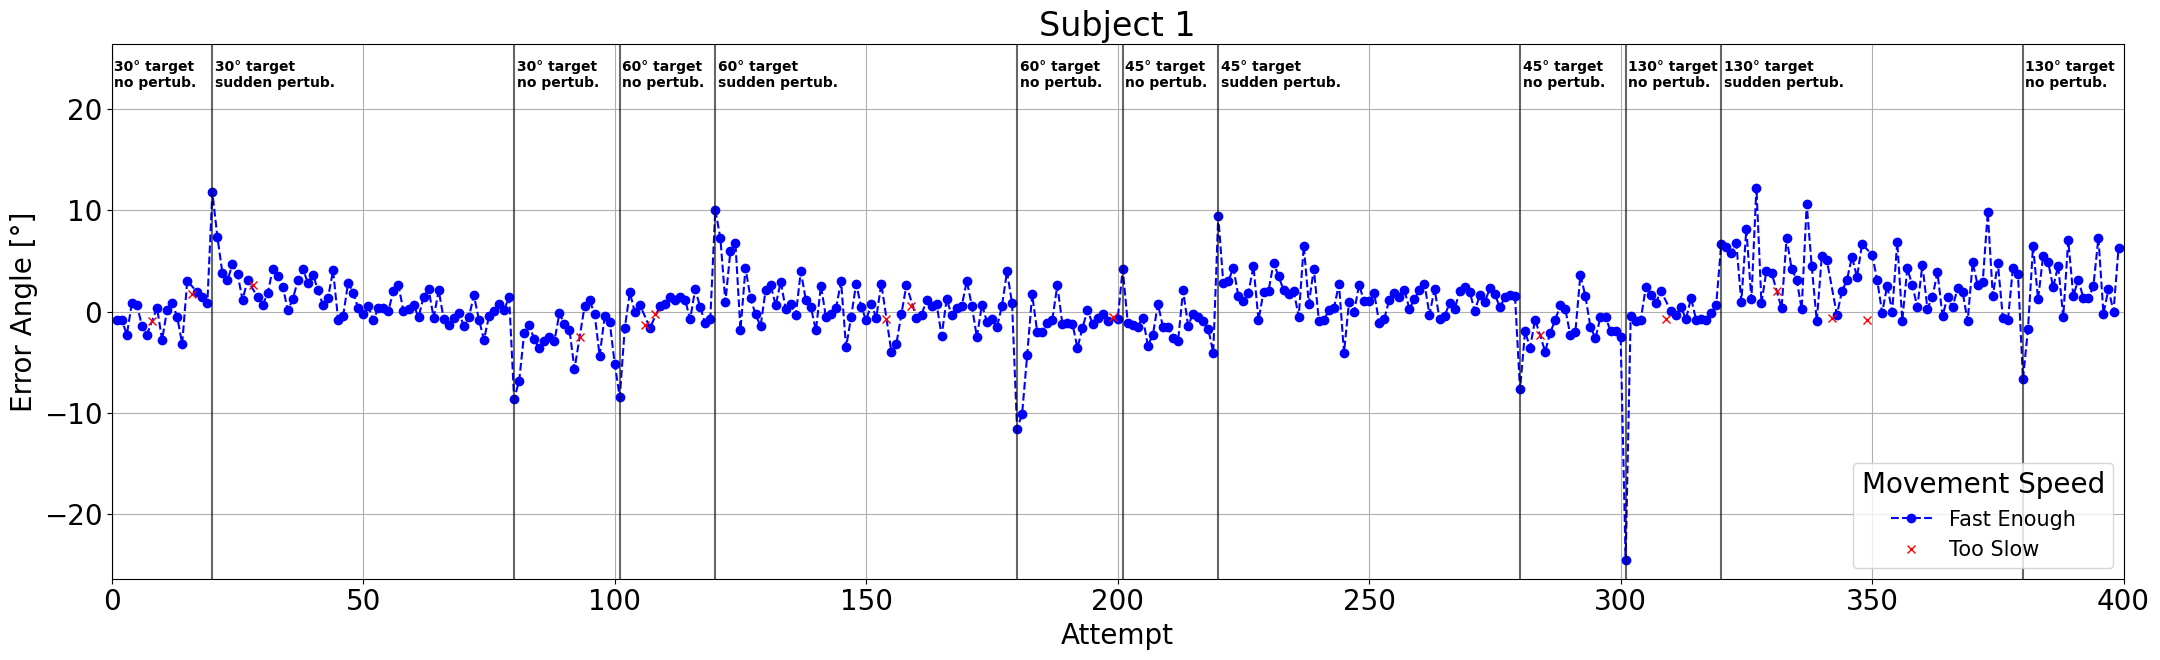

In [48]:
experiment_design = "generalisation"
number = 0

# load data
error_angles_gen_0 = pd.read_csv(f'{experiment_design}/gen_{number}/error_angles_gen_{number}_{experiment_design}.csv', header=None)
error_angles_gen_0 = error_angles_gen_0.to_numpy(dtype=float).flatten()

move_faster_events_gen_0 = pd.read_csv(f'{experiment_design}/gen_{number}/move_faster_gen_{number}_{experiment_design}.csv', header=None)
move_faster_events_gen_0 = move_faster_events_gen_0.to_numpy(dtype=bool).flatten()

attempts = np.arange(1, len(error_angles_gen_0)+1)

# plot error angles
fig = plt.figure(figsize=(22, 7))
plt.rcParams.update({'font.size': 20})

plt.plot(attempts[~move_faster_events_gen_0], error_angles_gen_0[~move_faster_events_gen_0], 'o', linestyle="--", color = "blue", label = "Fast Enough")
plt.plot(attempts[move_faster_events_gen_0], error_angles_gen_0[move_faster_events_gen_0], 'x', linestyle="", color = "red", label = "Too Slow")
ylim = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
plt.xlim(0, ATTEMPTS_LIMIT[experiment_design])
section_idxs = list(pertubations[experiment_design].keys()) + [ATTEMPTS_LIMIT[experiment_design]]
for sec_idx, x in enumerate(section_idxs[:-1]):
    plt.axvline(x=x, color='black', linestyle='-', alpha = 0.6)
    description = ""
    if "target_angle" in list(pertubations[experiment_design][x].keys()):
        description = str(pertubations[experiment_design][x]["target_angle"]) + "° target"
    description += "\n" + pertubations[experiment_design][x]["type"] + " pertub."
    plt.text(x+0.5, ylim - 1.5, description, color='black', verticalalignment='top', horizontalalignment='left', weight='bold', fontsize=10)
plt.ylim(-ylim, +ylim)
plt.grid()
plt.xlabel('Attempt')
plt.ylabel('Error Angle [°]')
plt.legend(title='Movement Speed', loc = "lower right", fontsize = 15)
plt.title("Subject 1")
plt.tight_layout()
plt.savefig(f'error_over_time_gen_0.png')
plt.show()

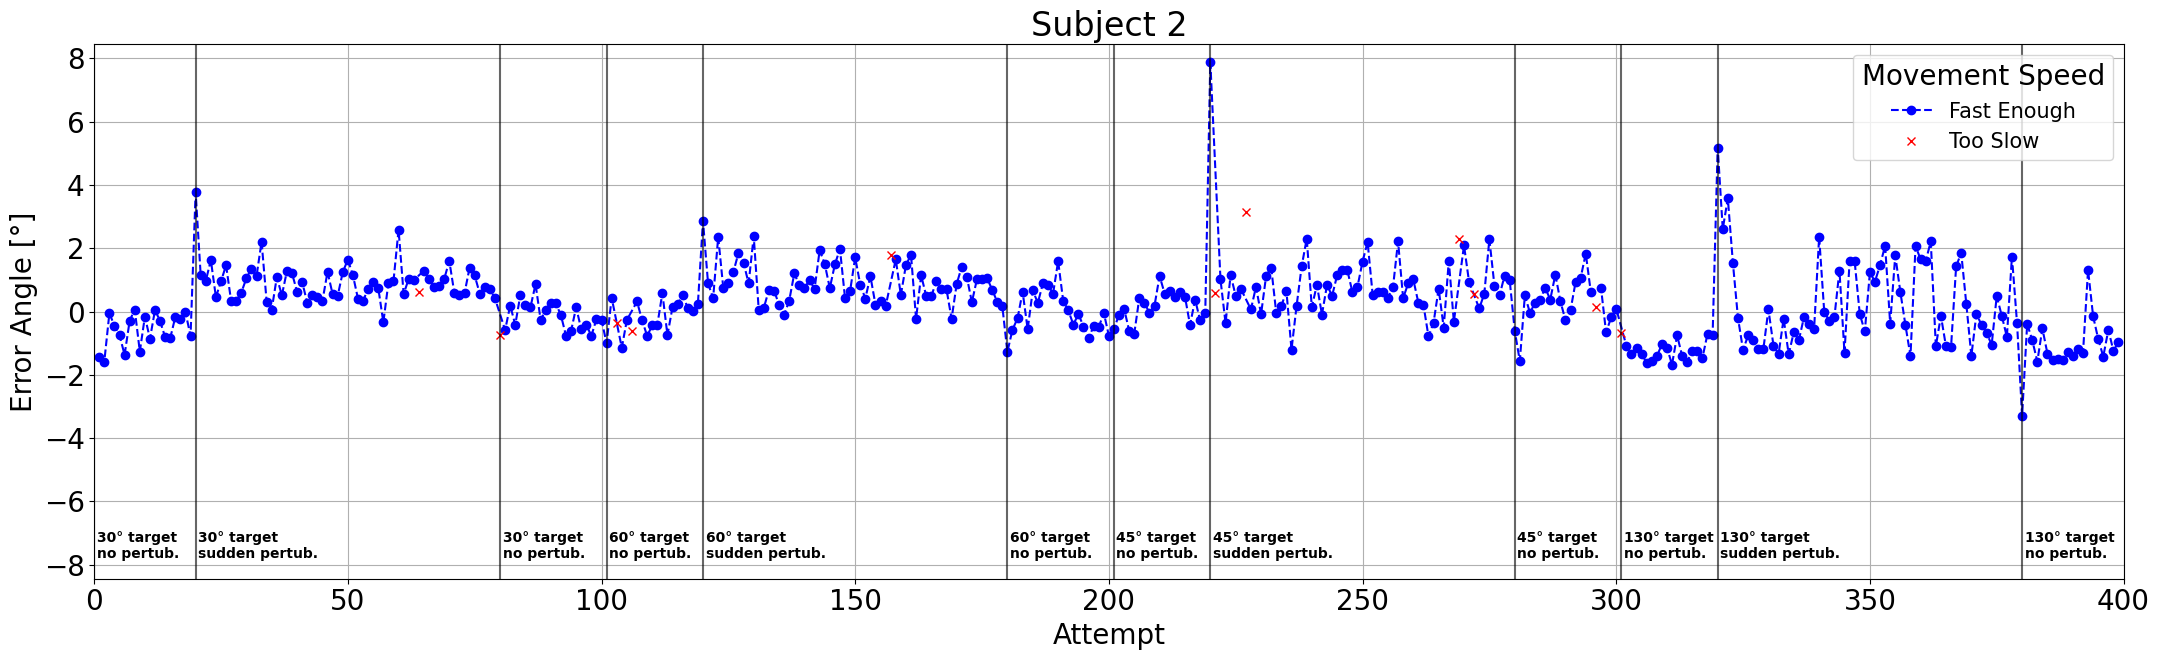

In [50]:
experiment_design = "generalisation"
number = 1

# load data
error_angles_gen_1 = pd.read_csv(f'{experiment_design}/gen_{number}/error_angles_gen_{number}_{experiment_design}.csv', header=None)
error_angles_gen_1 = error_angles_gen_1.to_numpy(dtype=float).flatten()

move_faster_events_gen_1 = pd.read_csv(f'{experiment_design}/gen_{number}/move_faster_gen_{number}_{experiment_design}.csv', header=None)
move_faster_events_gen_1 = move_faster_events_gen_1.to_numpy(dtype=bool).flatten()

attempts = np.arange(1, len(error_angles_gen_1)+1)

# plot error angles
fig = plt.figure(figsize=(22, 7))
plt.rcParams.update({'font.size': 20})

plt.plot(attempts[~move_faster_events_gen_1], error_angles_gen_1[~move_faster_events_gen_1], 'o', linestyle="--", color = "blue", label = "Fast Enough")
plt.plot(attempts[move_faster_events_gen_1], error_angles_gen_1[move_faster_events_gen_1], 'x', linestyle="", color = "red", label = "Too Slow")
ylim = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
plt.xlim(0, ATTEMPTS_LIMIT[experiment_design])
for sec_idx, x in enumerate(section_idxs[:-1]):
    plt.axvline(x=x, color='black', linestyle='-', alpha = 0.6)
    description = ""
    if "target_angle" in list(pertubations[experiment_design][x].keys()):
        description = str(pertubations[experiment_design][x]["target_angle"]) + "° target"
    description += "\n" + pertubations[experiment_design][x]["type"] + " pertub."
    plt.text(x+0.5, - ylim + 1.5, description, color='black', verticalalignment='top', horizontalalignment='left', weight='bold', fontsize=10)
plt.ylim(-ylim, +ylim)
plt.grid()
plt.xlabel('Attempt')
plt.ylabel('Error Angle [°]')
plt.legend(title='Movement Speed', loc = "upper right", fontsize = 15)
plt.title("Subject 2")
plt.tight_layout()
plt.savefig(f'error_over_time_gen_1.png')
plt.show()

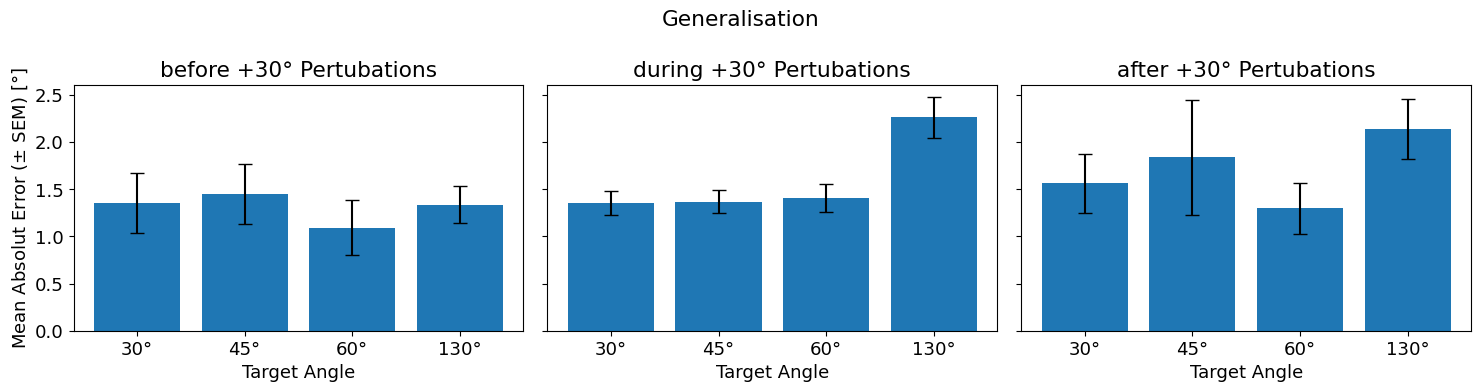

In [52]:
experiment_design = "generalisation"

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
plt.rcParams.update({'font.size': 13})

error_angles_means = [[], [], []] # before, during, after pertubation
error_angles_sems = [[], [], []]

section_idxs = list(pertubations[experiment_design].keys()) + [ATTEMPTS_LIMIT[experiment_design]]
for i in range(0, len(section_idxs) - 1):
    error_angles_i = np.abs(np.concatenate([error_angles_gen_0[section_idxs[i]:section_idxs[i+1]][~move_faster_events_gen_0[section_idxs[i]:section_idxs[i+1]]], 
                                            error_angles_gen_1[section_idxs[i]:section_idxs[i+1]][~move_faster_events_gen_1[section_idxs[i]:section_idxs[i+1]]] ]))
    error_angles_means[i % 3].append(error_angles_i.mean())
    error_angles_sems[i % 3].append(error_angles_i.std() / np.sqrt(len(error_angles_i))) 

labels = ["30°", "60°", "45°", "130°"]

fig.suptitle("Generalisation")

axs[0].bar([1, 3, 2, 4], error_angles_means[0], yerr=error_angles_sems[0], capsize=5)
axs[0].set_xticks([1, 3, 2, 4], labels)
axs[0].set_ylabel(r"Mean Absolut Error ($\pm$ SEM) [°]")
axs[0].set_xlabel("Target Angle")
axs[0].set_title("before +30° Pertubations")

axs[1].bar([1, 3, 2, 4], error_angles_means[1], yerr=error_angles_sems[1], capsize=5)
axs[1].set_xticks([1, 3, 2, 4], labels)
axs[1].set_xlabel("Target Angle")
axs[1].set_title("during +30° Pertubations")

axs[2].bar([1, 3, 2, 4], error_angles_means[2], yerr=error_angles_sems[2], capsize=5)
axs[2].set_xticks([1, 3, 2, 4], labels)
axs[2].set_title("after +30° Pertubations")
axs[2].set_xlabel("Target Angle")

plt.tight_layout()
plt.savefig(f'error_bars_gen.png')
plt.show()

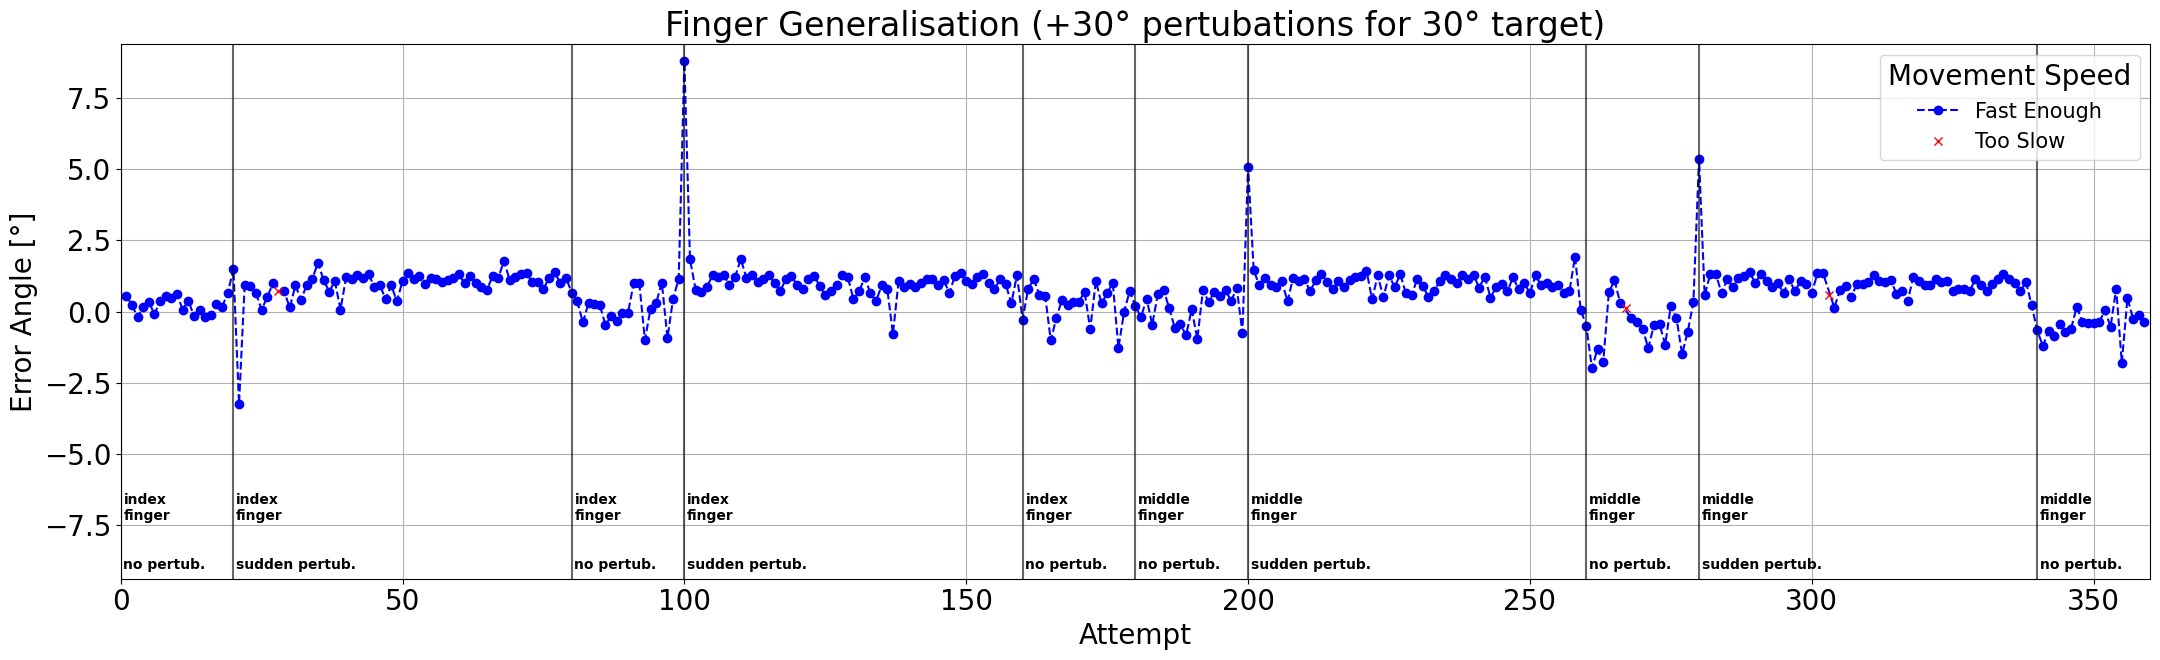

In [53]:
experiment_design = "finger"
number = 1

# load data
error_angles_finger = pd.read_csv(f'{experiment_design}s/karim_works/error_angles_karim_works_fingers.csv', header=None)
error_angles_finger = error_angles_finger.to_numpy(dtype=float).flatten()

move_faster_events_finger = pd.read_csv(f'{experiment_design}s/karim_works/move_faster_karim_works_fingers.csv', header=None)
move_faster_events_finger = move_faster_events_finger.to_numpy(dtype=bool).flatten()

attempts = np.arange(1, len(error_angles_finger)+1)

# plot error angles
fig = plt.figure(figsize=(22, 7))
plt.rcParams.update({'font.size': 20})

plt.plot(attempts[~move_faster_events_finger], error_angles_finger[~move_faster_events_finger], 'o', linestyle="--", color = "blue", label = "Fast Enough")
plt.plot(attempts[move_faster_events_finger], error_angles_finger[move_faster_events_finger], 'x', linestyle="", color = "red", label = "Too Slow")
ylim = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
plt.xlim(0, ATTEMPTS_LIMIT[experiment_design]) 
section_idxs = list(pertubations[experiment_design].keys()) + [ATTEMPTS_LIMIT[experiment_design]]
for sec_idx, x in enumerate(section_idxs[:-1]):
    plt.axvline(x=x, color='black', linestyle='-', alpha = 0.6)
    description = ""
    if "finger" in list(pertubations[experiment_design][x].keys()):
        description = str(pertubations[experiment_design][x]["finger"]) + "\nfinger\n\n"
    description += "\n" + pertubations[experiment_design][x]["type"] + " pertub."
    plt.text(x+0.5, - ylim + 3, description, color='black', verticalalignment='top', horizontalalignment='left', weight='bold', fontsize=10)
plt.ylim(-ylim, +ylim)
plt.grid()
plt.xlabel('Attempt')
plt.ylabel('Error Angle [°]')
plt.legend(title='Movement Speed', loc = "upper right", fontsize = 15)
plt.title("Finger Generalisation (+30° pertubations for 30° target)")
plt.tight_layout()
plt.savefig(f'error_over_time_finger.png')
plt.show()

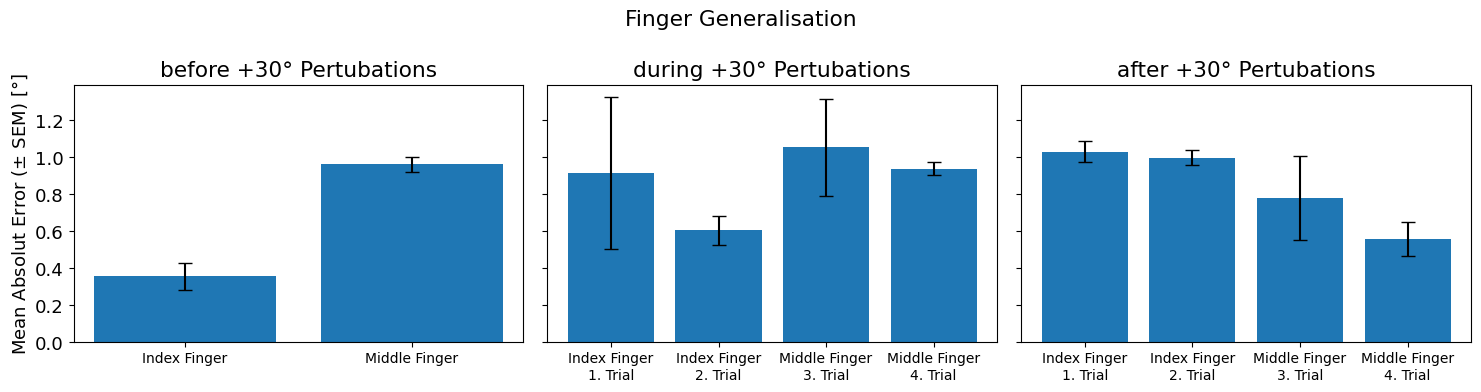

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
plt.rcParams.update({'font.size': 13})

error_angles_means = [[], [], []] # before, during, after pertubation
error_angles_sems = [[], [], []]

section_idxs = list(pertubations[experiment_design].keys()) + [ATTEMPTS_LIMIT[experiment_design]]
for i in range(0, len(section_idxs) - 1):
    error_angles_i = np.abs(np.concatenate([error_angles_finger[section_idxs[i]:section_idxs[i+1]][~move_faster_events_finger[section_idxs[i]:section_idxs[i+1]]]]))
    if i == 0 or i == 6:
        index = 0
    elif i in [2, 4, 7, 8]:
        index = 1
    else:
        index = 2
    error_angles_means[index].append(error_angles_i.mean())
    error_angles_sems[index].append(error_angles_i.std() / np.sqrt(len(error_angles_i))) 

fig.suptitle("Finger Generalisation")

axs[0].bar([1, 2], error_angles_means[0], yerr=error_angles_sems[0], capsize=5)
axs[0].set_xticks([1, 2], ["Index Finger", "Middle Finger"], fontsize = 10)
axs[0].set_ylabel(r"Mean Absolut Error ($\pm$ SEM) [°]")
axs[0].set_title("before +30° Pertubations")

labels = ["Index Finger\n1. Trial", "Index Finger\n2. Trial", "Middle Finger\n3. Trial", "Middle Finger\n4. Trial"]

axs[1].bar([1, 2, 3, 4], error_angles_means[1], yerr=error_angles_sems[1], capsize=5)
axs[1].set_xticks([1, 2, 3, 4], labels, fontsize = 10)
axs[1].set_title("during +30° Pertubations")

# Second subplot
axs[2].bar([1, 2, 3, 4], error_angles_means[2], yerr=error_angles_sems[2], capsize=5)
axs[2].set_xticks([1, 2, 3, 4], labels, fontsize = 10)
axs[2].set_title("after +30° Pertubations")

plt.tight_layout()
plt.savefig(f'error_bars_finger.png')
plt.show()